# Sunflower Simulator

## Flowers and the Golden Angle

Sunflowers distribute their seeds around the flower head using the golden angle, which is the golden ratio of a revolution around the circumference of the circle. The golden ratio is $ \phi = \frac{1 + \sqrt(5)}{2} \approx 1.618$. $1.618$ or revolutions or $0.618$ of a revalution are are the same for the purposes of establishing the angle so it's ok to use $ \psi = \frac{\sqrt 5 - 1}{2} \approx 0.618 $. Arguably $\phi$ and $\psi$ are both the golden ratio. The angle which measures $0.618$ of a rotation would be approximately $0.618 \cdot 360^\circ \approx 222^\circ$ or $1.24 \cdot \pi$ radians. As it grows, a sunflower places each seed a golden angle rotation away from the previous seed. The Numberphile channel on YouTube produced a brilliant video on the topic: https://www.youtube.com/watch?v=sj8Sg8qnjOg

Peter Derlien of University of Sheffield wrote a code to emulate a sunflower's behavior. The original is can be downloaded from (http://pi3.sites.sheffield.ac.uk/tutorials/week-2):

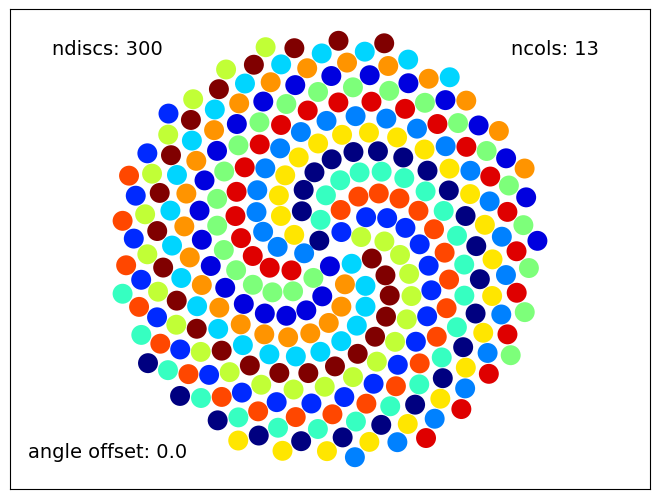

In [2]:

# chromoSpirals.py
# ----------------
# Code written by Peter Derlien, University of Sheffield, March 2013
# Draws spiralling patterns of circles using the Golden Angle.
# ----------------

# The code has been altered to facilitate presentation: wrapped the code in a function and commented out
# the prompts for number of discs, number of colors, and angle offset.

# Import from the numpy and matplotlib packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches

def Sunflower(ndiscs, ncols, offset):
    ox=0.5; oy=0.4 # centre of plot
    #ndiscs=input('No. of discs (e.g. 300)? ')
    #ncols=input('no. of colours (1 to 34)? ')
    #offset=input('offset (in radians) from golden angle? ')  
    tau=(1+5**0.5)/2.0 # golden ratio approx = 1.618033989
    #(2-tau)*2*np.pi is golden angle = c. 2.39996323 radians, or c. 137.5 degrees
    inc = (2-tau)*2*np.pi + offset
    theta=0
    k=0.1 # scale factor
    drad=k*(1+5**0.5)/4.0 # radius of each disc
    minv=maxv=0 # minv and maxv will be used later to display inputs chosen

    # now collect in list 'patches' the locations of all the discs
    patches = []
    for j in range(1,ndiscs+1):
        r = k*j**0.5
        theta += inc
        x = ox + r*np.cos(theta)
        y = oy + r*np.sin(theta)
        if y > maxv:
            maxv=y
        elif y < minv:
            minv=y
        disc = mpatches.Circle((x,y),drad) 
        patches.append(disc)

    # start building the plot 
    fig = plt.figure()
    ax = plt.axes([0,0,1,1])

    # create text to show which inputs the user has chosen
    font = "sans-serif" 
    maxv=maxv*0.95
    nd = 'ndiscs: '+ str(ndiscs)
    plt.text(minv, maxv, nd, ha="center",family=font, size=14)
    setting = 'angle offset: '+ str(offset)
    plt.text(minv, minv, setting, ha="center",family=font, size=14)
    nc = 'ncols: '+ str(ncols)
    plt.text(maxv, maxv, nc, ha="left",family=font, size=14)

    # build colour cycle, using a number between 0 and 100 for each colour
    colcycle=[]
    s=100/ncols
    for j in range(ndiscs):
        colcycle.append((j%ncols)*s)

    # bring together the information for locations and colours of discs
    collection = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=1.0)
    collection.set_array(np.array(colcycle))
    ax.add_collection(collection)

    ax.set_xticks([]); ax.set_yticks([]) # suppress display of axes
    plt.axis('equal')
    plt.show() # display the plot we have built

numberOfDiscs=300
colors=13
angleOffset=0.0
Sunflower(numberOfDiscs, colors, angleOffset)

This code produces impressive illustrations. One amazing property is that the arrangement of seeds is "spirally" but the apparent placement spirals depends of the coloration and the number of disks. It's fun to experiment with the values. Fibonacci numbers of colors tend to nicely color a Fibonacci number of spiral arms, e.g. see the $13$ spiral arms in the output graphic above and remember $F_7 = 13$. If the number of colors is $21$, you'll see $21$ spirals, because $F_8 = 21$.

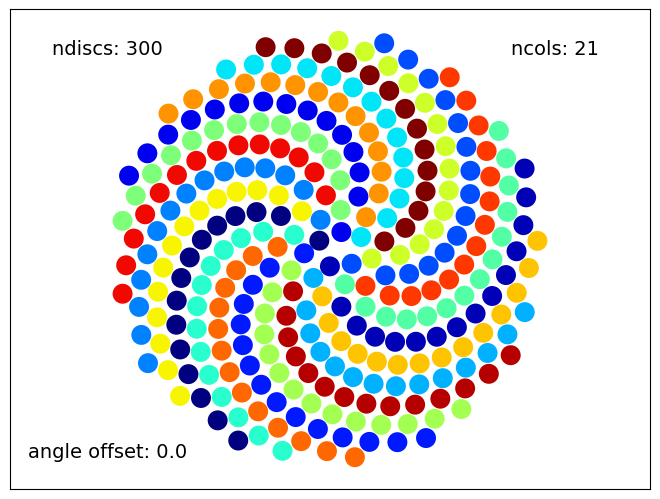

In [12]:
numberOfDiscs=300
colors=21
angleOffset=0.0
Sunflower(numberOfDiscs, colors, angleOffset)

What if the number of colors is not Fibonacci? How about, say $7$ colors?

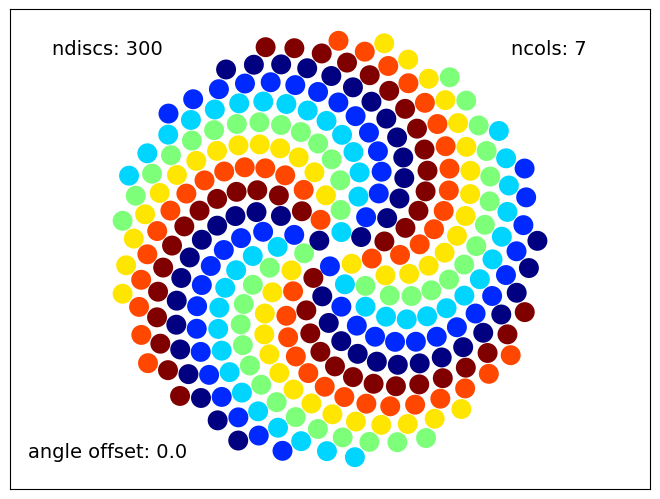

In [24]:
numberOfDiscs=300
colors=7
angleOffset=0.0
Sunflower(numberOfDiscs, colors, angleOffset)

Again, $21$ arms appeared, three of each color. Why? Becuase $21=3 \times 7$. Ok what if the number of colors is also not a divisor of a Fibonacci number? Maybe $12$ colors?

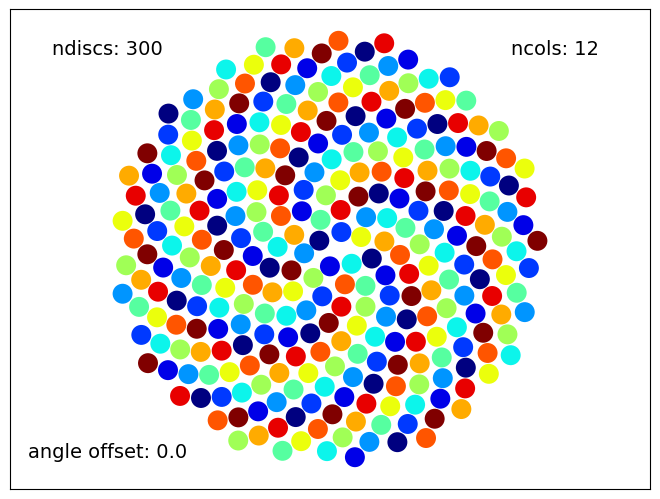

In [25]:
numberOfDiscs=300
colors=12
angleOffset=0.0
Sunflower(numberOfDiscs, colors, angleOffset)

With $12$ colors, $13$ arms appeared. But each arm cycles through the color palatte. It happens because $12$ is close to the Fibonacci number $13$. By the way, $12$ in fact does divide a Fibonacci number, because $F_{12} = 144$. Watch what happens if the number of colors remains at $12$ but the scale is increased by adding more discs:

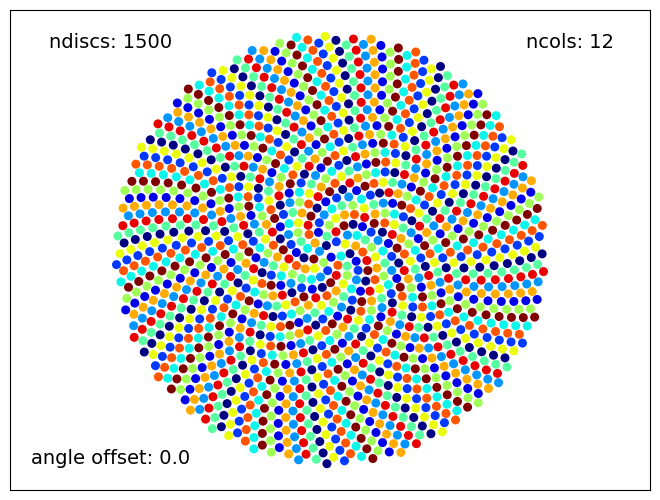

In [27]:
numberOfDiscs=1500
colors=12
angleOffset=0.0
Sunflower(numberOfDiscs, colors, angleOffset)

At a greater scale, $144$ arms appeared with $12$ arms of each color.

I thought this code could draw a great logo for my web page, but I wanted to alter the shape and color. The original code can make the seeds all one color but only dark blue, which would't show up well if a visitor switched my page to dark mode.

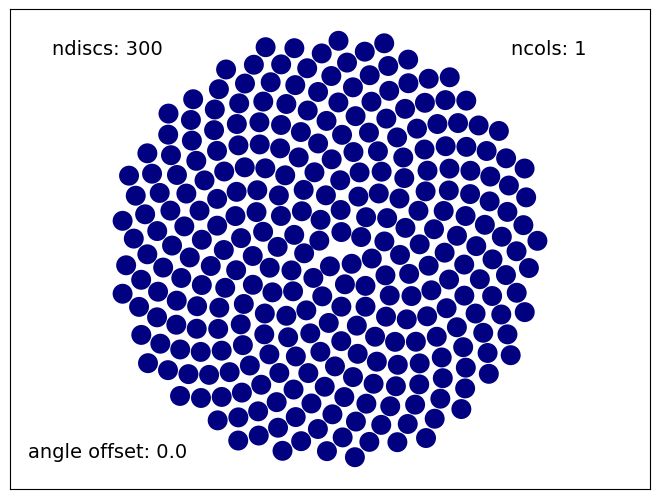

In [4]:
numberOfDiscs=300
colors=1
angleOffset=0.0
Sunflower(numberOfDiscs, colors, angleOffset)

So I needed to chose another color. Red contrasts well against both light and dark backgrounds. I thought it might be more interesting to change the seed shape to square so that they can pack really tightly together. So I did all that. Additionally, I decreased the sizes of the central seeds so that they wouldn't overlap; I included an exponent on the expression for the `side` variable which specifies each square's side length. The size adjustment is ad hoc but the result came out nicely. I removed the text and border as well.

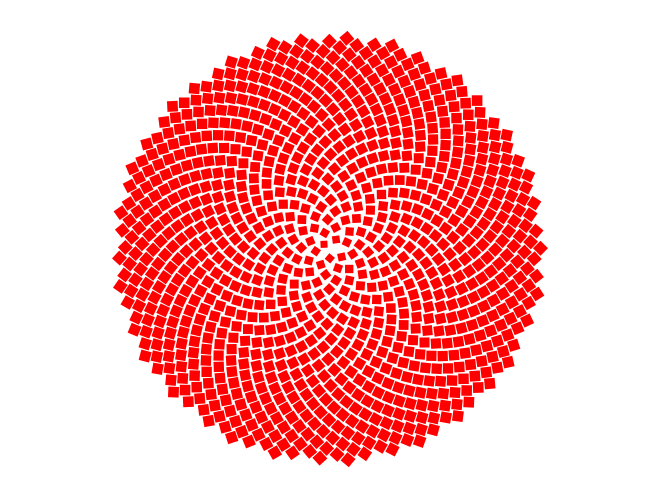

In [28]:

# Uses the golden angle to draw circle in a pattern mimicking seeds of a 
# sunflower. Adapted from code written by Peter Derlien, University of Sheffield

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

SAVE = False

ox=0.5; oy=0.4 # centre of plot
nseeds=1000
phi=(1+5**0.5)/2.0 # golden ratio approx = 1.618033989
#(2-phi)*2*np.pi is golden angle = c. 2.39996323 radians, or c. 137.5 degrees
inc = (2-phi)*2*np.pi
theta=0
k=0.1 # scale factor
minv=maxv=0 # minv and maxv will be used later to display inputs chosen

# start building the plot 
fig = plt.figure()
ax = plt.axes([0,0,1,1])

sideFactor=0.85 * k * phi 
for j in range(1,nseeds+1):
    r = k*j**0.5
    theta += inc # Angle in radians for revolving the square arond the center with trig functions
    degrees = theta / 2 / np.pi * 360 # angle in degrees for rotating the square
#    side = 0.65 * k * phi * r ** 0.12
    side = sideFactor * r ** 0.12
    x = ox + r*np.cos(theta) - side / 2 # mpl draws squares from the lower left corner so offset (x, y) by side / 2
    y = oy + r*np.sin(theta) - side / 2
    if y > maxv:
        maxv=y
    elif y < minv:
        minv=y
    disc = mpatches.Rectangle((x,y), side, side, angle = 45 + degrees, rotation_point = 'center', facecolor='red')
    ax.add_patch(disc)
   
ax.set_xticks([]); ax.set_yticks([]) # suppress display of axes
plt.axis('equal')
plt.axis('off')
if SAVE:
    plt.savefig('test.png', bbox_inches='tight',transparent=True, pad_inches=0)
plt.show() # display the plot we have built



Notice how the appearnce of spiral arms depends on the distance from the center. From the outer edge, there are $55$ spiral arms, or perhaps $89$, depending on which direction you count. Closer to the center, $21$ or $13$. In general, the further from the center, the greater the number of apparent spirals.

![Counting spirals](sfspirals.png)

Below is a photo of the head of a sunflower recently purchased from Trader Joe's. The arrangement of florets inside is strikingly similar to the mathematical model. I tried counting spirals and found one strange that seems out of place and doesn't reach to the center. Including all of them I counted $F_{10}=55$ spirals. Feel free to double check my count.

![Sunflower with 55ish spirals](Sunflower55.png)

Below is a photo of a Dalia also from Trader Joe's. The petals don't seem to be nicely arranged in spirals but I tried counting anyway. I counted $F_7=13$ of them; Coincidence?

![Dalia with 13 spirals maybe?](Dalia13.png)